In [1]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
BohrRad=0.529177e-10
Dalton=1.66053906892e-27

me=9.1093837e-31
mH=1.00784*Dalton
mT=3.01604928178*Dalton

In [3]:
# From Silvera
def SilveraV(R):
    return np.exp(0.09678-1.10173*R-0.03945*R**2)+np.exp(-(10.04/R-1)**2)*(-6.5/R**6-124/R**8-3285/R**10)

# From Al Maaitah
def SilveraV2(R):
    x=R*BohrRad/4.16e-10
    D=1.28
    KToH=315775
    F=(x>D)+(x<D)*np.exp(-(D/x-1)**2)
    return 6.46/KToH*(4.889e4*np.exp(0.0968-8.6403*x-2.427*x**2)-(1.365/x**6+0.425/x**8+0.183/x**10)*F)

# Pick this one.
Potential=SilveraV2

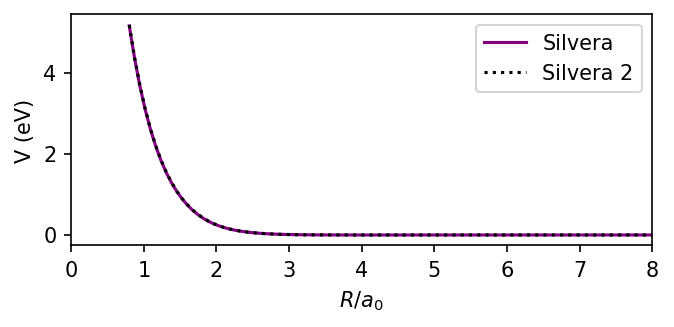

In [4]:
plt.figure(figsize=(5,2),dpi=150)
Rs=np.linspace(0.8,8,100)
plt.plot(Rs,SilveraV(Rs/0.53)*27,label='Silvera',color='purple')
plt.plot(Rs,SilveraV2(Rs/0.53)*27,':',label='Silvera 2',color='black')
plt.xlabel(r"$R/a_0$")
plt.xlim(0,8)
plt.ylabel("V (eV)")
plt.legend(loc='upper right')


(0.0, 8.0)

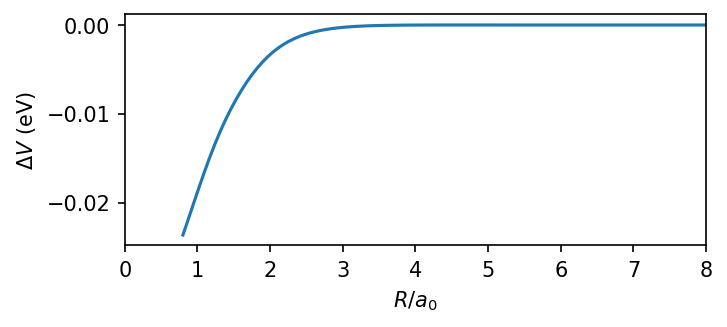

In [5]:
plt.figure(figsize=(5,2),dpi=150)

plt.plot(Rs,(SilveraV(Rs/0.53)-SilveraV2(Rs/0.53))*27)
plt.ylabel("$\Delta V$ (eV)" )
plt.xlabel(r"$R/a_0$")
plt.xlim(0,8)

In [6]:
# Diff eq to solve
def ddx(y,rho):
    u=y[0]
    v=y[1]
    dudx=v
    dvdx=(-k0**2+2*muove* Potential(rho))*u
    return [dudx,dvdx]

In [7]:
# Method following O'Hara thesis
def GetScatLengths(bigrhos):
    ScatLengths=[]
    for bigrho in bigrhos:
        rhos=np.linspace(0.000015,bigrho,int(bigrho)*10)
        soln=odeint(ddx,init,rhos,rtol=1e-13)
        swv_delta=np.arctan(k0*soln[:,0]/soln[:,1])-k0*rhos
        ScatLengths.append(-np.tan(swv_delta[-1])/k0)
    return ScatLengths

In [8]:
#Work them out for H and T

init=[0,1]
k0=1e-5

ScatLengthH=[]
ScatLengthT=[]

bigrhos=np.linspace(20,50,10)

muove=mH/(2*me)
ScatLengthH=GetScatLengths(bigrhos)

muove=mT/(2*me)
ScatLengthT=GetScatLengths(bigrhos)

Text(0, 0.5, 'a (pm)')

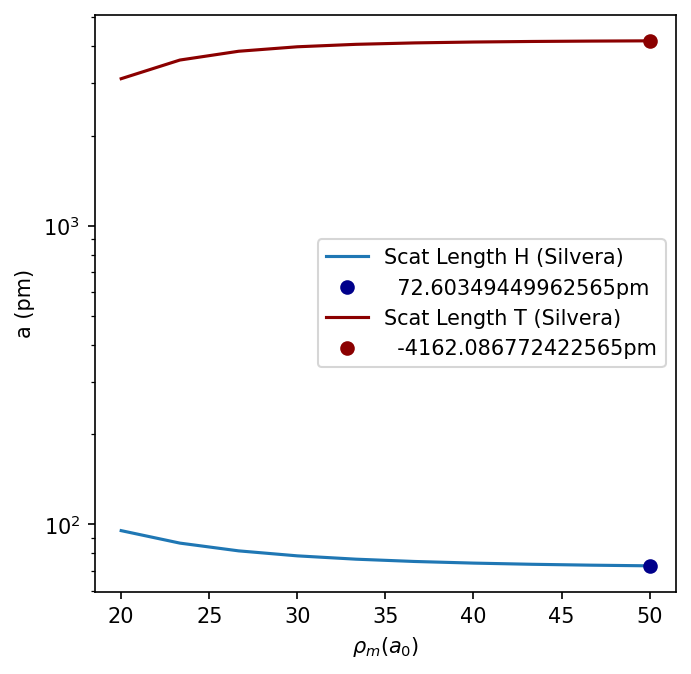

In [9]:
# The value in the large rho_m limit is the scattering length

plt.figure(figsize=(5,5),dpi=150)
plt.plot(bigrhos,np.abs(np.array(ScatLengthH)*BohrRad)*1e12,label='Scat Length H (Silvera)')
plt.plot(bigrhos[-1],np.abs(ScatLengthH[-1])*BohrRad*1e12,'o',color='DarkBlue',label='  '+str(ScatLengthH[-1]*BohrRad*1e12 )+ 'pm')
plt.plot(bigrhos,np.abs(np.array(ScatLengthT)*BohrRad)*1e12,label='Scat Length T (Silvera)',color='DarkRed')
plt.plot(bigrhos[-1],np.abs(ScatLengthT[-1])*BohrRad*1e12,'o',color='DarkRed',label='  '+str(ScatLengthT[-1]*BohrRad*1e12 )+ 'pm')



plt.legend(loc='center right')
plt.semilogy()
plt.xlabel(r"$\rho_m (a_0)$")
plt.ylabel("a (pm)")

In [16]:
Potential=SilveraV2
Ms=np.linspace(0.5,4,100)
ScatLengths=[]
for m in Ms:
    muove=mH*m/(2*me)
    ScatLengths.append(GetScatLengths([50]))

Potential=SilveraV
ScatLengths2=[]
for m in Ms:
    muove=mH*m/(2*me)
    ScatLengths2.append(GetScatLengths([50]))
    
    

Text(0, 0.5, 'Scattering length (pm)')

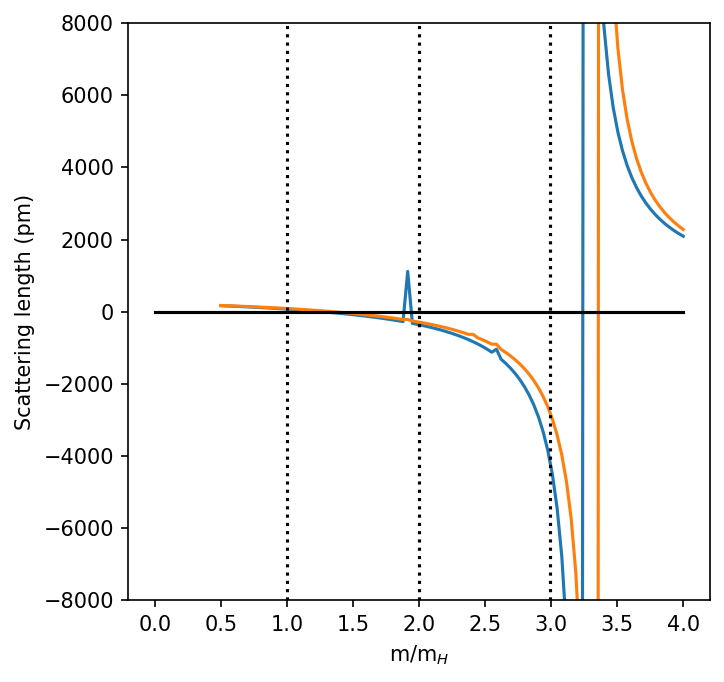

In [18]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(Ms,np.array(ScatLengths)*BohrRad*1e12)
plt.plot(Ms,np.array(ScatLengths2)*BohrRad*1e12)

plt.xlabel(r"m/m$_H$")
plt.plot([mT/mH,mT/mH],[-8000,8000],':',color='black')
plt.plot([mH/mH,mH/mH],[0-8000,8000],':',color='black')
plt.plot([2,2],[0-8000,8000],':',color='black')

plt.ylim(-8000,8000)

plt.plot([0,4],[0,0],'-',color='black')
plt.ylabel("Scattering length (pm)")
